In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # biblioteca para plotar gráficos
import seaborn as sns
%matplotlib inline 

In [23]:
x = np.array([1, 1, 2, 3, 2, 0]) # definição dos arrays aleatórios
y = np.array([0, 1, 1, 2, 3, 2, 1])

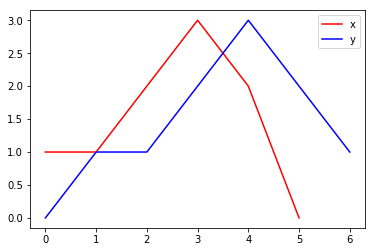

In [7]:
plt.plot(x,'r', label ='x') # plotando os dois arrays
plt.plot(y, 'b', label ='y')
plt.legend();

In [8]:
distances = np.zeros((len(y), len(x))) # preenchendo uma nova matriz com zeros

In [9]:
distances # calculando distâncias

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [11]:
for i in range(len(y)):
    for j in range(len(x)):
        distances[i,j] = (x[j]-y[i])**2  # percorrendo a matriz e calculando distâncias euclidianas

In [12]:
distances

array([[1., 1., 4., 9., 4., 0.],
       [0., 0., 1., 4., 1., 1.],
       [0., 0., 1., 4., 1., 1.],
       [1., 1., 0., 1., 0., 4.],
       [4., 4., 1., 0., 1., 9.],
       [1., 1., 0., 1., 0., 4.],
       [0., 0., 1., 4., 1., 1.]])

In [18]:
def distance_cost_plot(distances): # função que plota os valores com cores
    im = plt.imshow(distances, interpolation='nearest', cmap='Purples') 
    plt.gca().invert_yaxis()
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid()
    plt.colorbar();

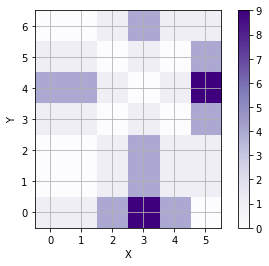

In [19]:
distance_cost_plot(distances)

In [20]:
accumulated_cost = np.zeros((len(y), len(x))) 

In [25]:
accumulated_cost[0,0] = distances[0,0]

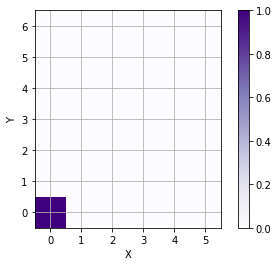

In [26]:
distance_cost_plot(accumulated_cost)

In [27]:
for i in range(1, len(x)): 
    accumulated_cost[0,i] = distances[0,i] + accumulated_cost[0, i-1] # preenche as colunas conforme o menor valor anterior

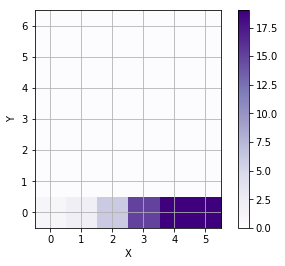

In [28]:
distance_cost_plot(accumulated_cost)

In [29]:
for i in range(1, len(y)):
    accumulated_cost[i,0] = distances[i, 0] + accumulated_cost[i-1, 0] # preenche a matriz conforme o menor valor anterior

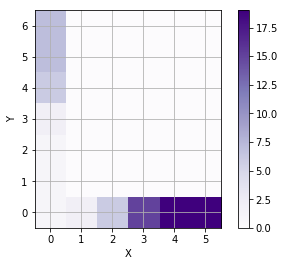

In [30]:
distance_cost_plot(accumulated_cost) 

In [31]:
for i in range(1, len(y)): # percorrendo todas as linhas e colunas simultaneamente
    for j in range(1, len(x)):
        accumulated_cost[i, j] = min(accumulated_cost[i-1, j-1], accumulated_cost[i-1, j], accumulated_cost[i, j-1]) + distances[i, j]

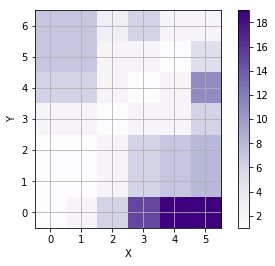

In [32]:
distance_cost_plot(accumulated_cost)

In [41]:
path = [[len(x)-1, len(y)-1]] # iniciando do tamanho máximo dos vetores
i = len(y)-1 
j = len(x)-1
while i > 0 and j > 0: # enquanto não encontrar a posição (0, 0)
    if i == 0:
        j = j - 1
    elif j == 0:
        i = i - 1
    else:
        if accumulated_cost[i-1, j] == min(accumulated_cost[i-1, j-1], accumulated_cost[i-1, j], accumulated_cost[i, j-1]):
            i = i - 1
        elif accumulated_cost[i, j-1] == min(accumulated_cost[i-1, j-1], accumulated_cost[i-1, j], accumulated_cost[i, j-1]):
            j = j - 1
        else:
            i = i - 1
            j= j- 1
    path.append([j, i])
path.append([0,0])

In [34]:
path

[[5, 6], [4, 5], [3, 4], [2, 3], [1, 2], [1, 1], [0, 1], [0, 0]]

In [35]:
path_x = [point[0] for point in path]
path_y = [point[1] for point in path]

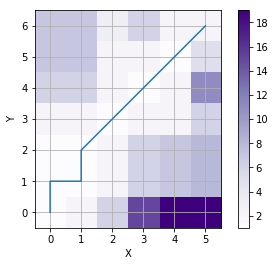

In [36]:
distance_cost_plot(accumulated_cost)
plt.plot(path_x, path_y);

In [42]:
def path_cost(x, y, accumulated_cost, distances):
    path = [[len(x)-1, len(y)-1]]
    cost = 0
    i = len(y)-1
    j = len(x)-1
    while i > 0 and j>0:
        if i == 0:
            j = j - 1
        elif j == 0:
            i = i - 1
        else:
            if accumulated_cost[i-1, j] == min(accumulated_cost[i-1, j-1], accumulated_cost[i-1, j], accumulated_cost[i, j-1]):
                i = i - 1
            elif accumulated_cost[i, j-1] == min(accumulated_cost[i-1, j-1], accumulated_cost[i-1, j], accumulated_cost[i, j-1]):
                j = j-1
            else:
                i = i - 1
                j= j- 1
        path.append([j, i])
    path.append([0,0])
    for [y, x] in path:
        cost = cost + distances[x, y]
    return path, cost    

5 0 : 6 1
4 2 : 5 2
3 3 : 4 3
2 2 : 3 2
1 1 : 2 1
1 1 : 1 1
0 1 : 1 1
0 1 : 0 0


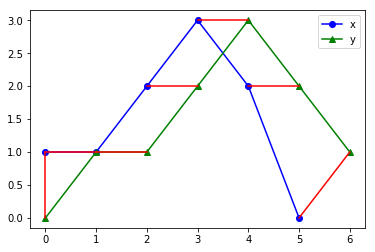

In [43]:
plt.plot(x, 'bo-' ,label = 'x')
plt.plot(y, 'g^-', label = 'y')
plt.legend();
paths = path_cost(x, y, accumulated_cost, distances)[0]
for [map_x, map_y] in paths:
    print (map_x, x[map_x], ":", map_y, y[map_y])
    
    plt.plot([map_x, map_y], [x[map_x], y[map_y]], 'r')